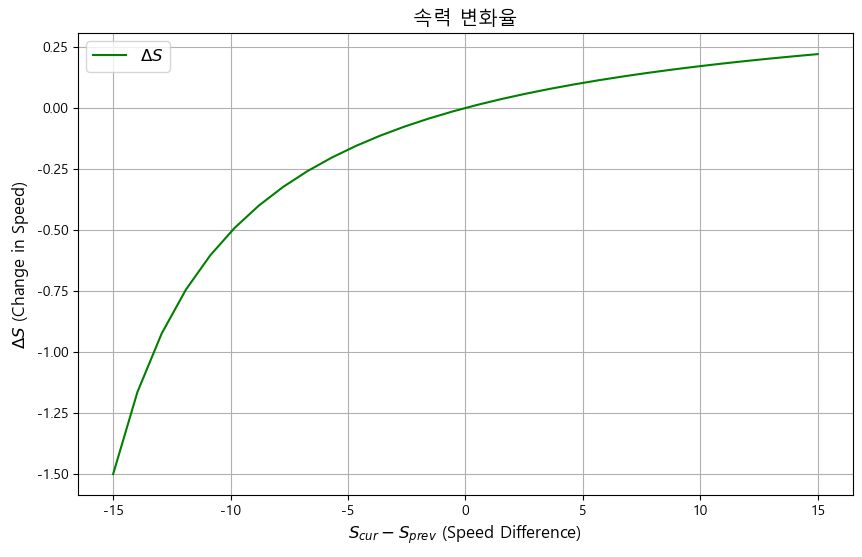

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# 한글 및 마이너스 기호 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우 '맑은 고딕' 설정

# Speed values (linearly increasing)
S_prev = np.arange(10, 70, 2)  # Previous speeds

# Adjust S_cur to ensure the difference (S_cur - S_prev) is at most 30
S_cur = S_prev + np.linspace(-15, 15, len(S_prev))  # Adjusted current speeds with max difference ±15

# Calculate ΔS
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)

# Calculate absolute difference
abs_delta_S = S_cur - S_prev

# Plot ΔS vs (S_cur - S_prev)
plt.figure(figsize=(10, 6))
plt.plot(abs_delta_S, delta_S, label="$\\Delta S$", color="green")
plt.title("속력 변화율", fontsize=14)
plt.xlabel("$S_{cur} - S_{prev}$ (Speed Difference)", fontsize=12)
plt.ylabel("$\\Delta S$ (Change in Speed)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


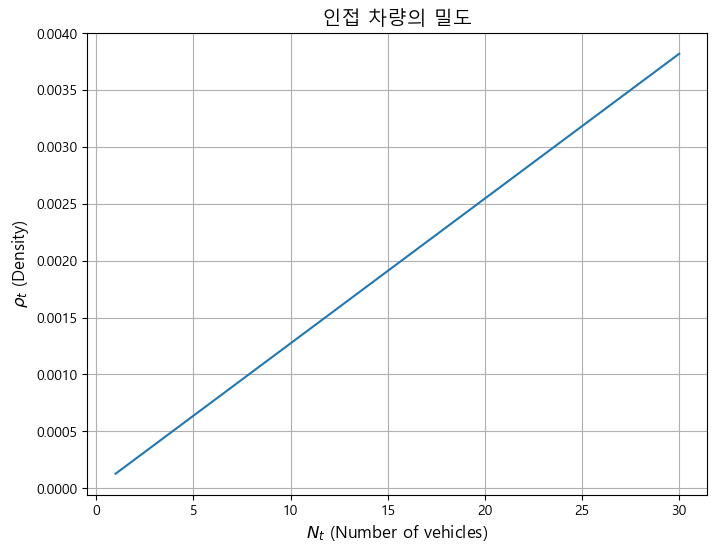

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30

# Calculate density
rho_t = N_t / (np.pi * R**2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(N_t, rho_t)
plt.title("인접 차량의 밀도", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$\\rho_t$ (Density)", fontsize=12)
plt.grid()
plt.show()


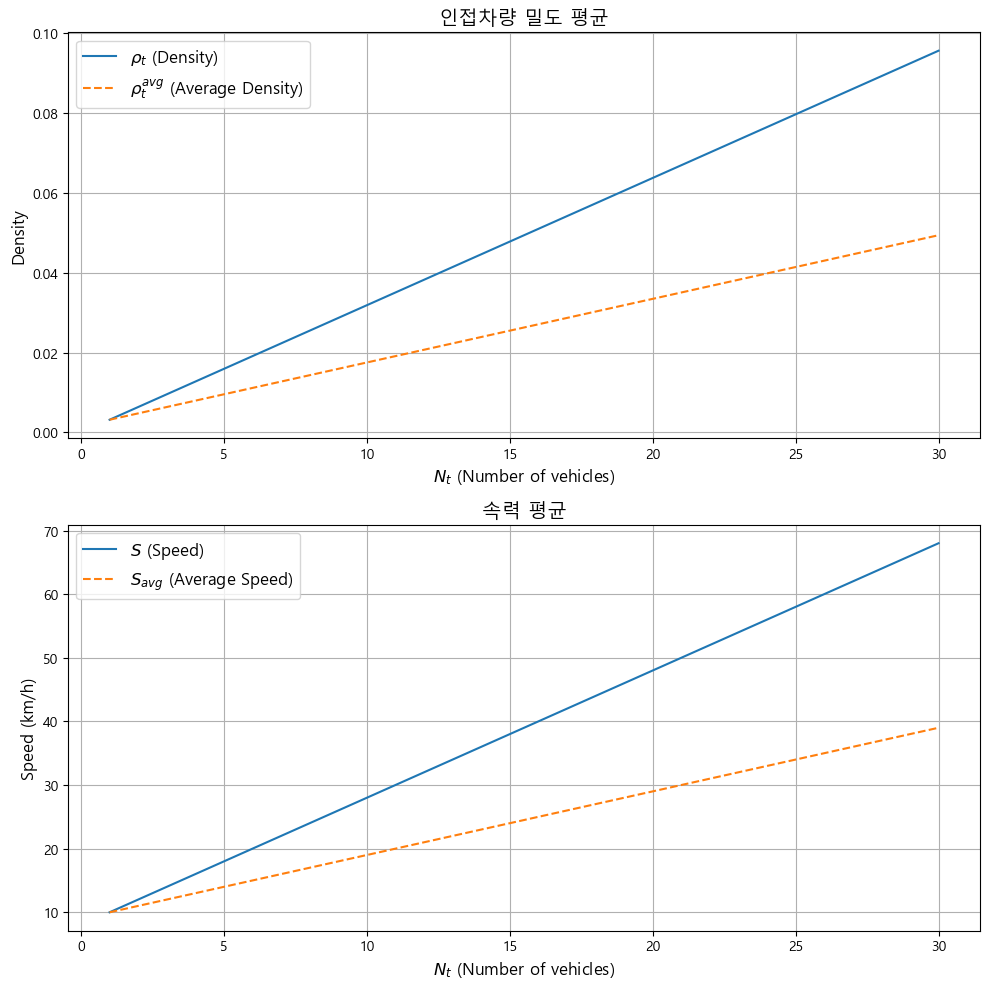

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters
R = 10  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
S = np.arange(10, 71, 2)  # Speeds from 10 to 70 (step of 2)

# Ensure S matches the length of N_t (if required, resize or repeat)
S = S[:len(N_t)]

# Calculate density
rho_t = N_t / (np.pi * R**2)

# Calculate average density
rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)

# Calculate average speed
S_avg = np.cumsum(S) / np.arange(1, len(S) + 1)

# Create two subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# First plot: Density and Average Density
axs[0].plot(N_t, rho_t, label="$\\rho_t$ (Density)")
axs[0].plot(N_t, rho_t_avg, label="$\\rho_t^{avg}$ (Average Density)", linestyle="--")
axs[0].set_title("인접차량 밀도 평균", fontsize=14)
axs[0].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[0].set_ylabel("Density", fontsize=12)
axs[0].legend(fontsize=12)
axs[0].grid()

# Second plot: Speed and Average Speed
axs[1].plot(N_t, S, label="$S$ (Speed)")
axs[1].plot(N_t, S_avg, label="$S_{avg}$ (Average Speed)", linestyle="--")
axs[1].set_title("속력 평균", fontsize=14)
axs[1].set_xlabel("$N_t$ (Number of vehicles)", fontsize=12)
axs[1].set_ylabel("Speed (km/h)", fontsize=12)
axs[1].legend(fontsize=12)
axs[1].grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


[ 2.      2.6897  5.3793  8.069  10.7586 13.4483 16.1379 18.8276 21.5172
 24.2069 26.8966 29.5862 32.2759 34.9655 37.6552 40.3448 43.0345 45.7241
 48.4138 51.1034 53.7931 56.4828 59.1724 61.8621 64.5517 67.2414 69.931
 72.6207 75.3103 78.    ]
[10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56
 58 60 62 64 66 68]
[0.01   0.0137 0.0152 0.0188 0.0216 0.0239 0.0257 0.0272 0.0285 0.0296
 0.0306 0.0314 0.0322 0.0328 0.0334 0.034  0.0344 0.0349 0.0353 0.0356
 0.036  0.0363 0.0366 0.0368 0.0371 0.0373 0.0375 0.0377 0.0379 0.0381]


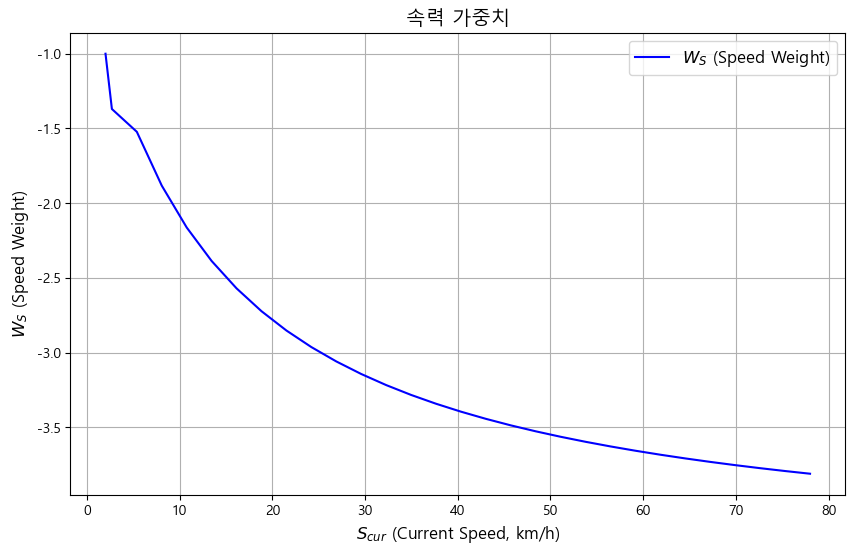

In [5]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
import platform
from matplotlib import font_manager, rc # type: ignore

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
    
W_base_S = 0.0037
F_S = 0.3
F_change = 0.03
W_min = 0.01
W_max = 0.10

S_prev = np.arange(10, 70, 2)
S_cur = np.clip(S_prev + np.linspace(-10, 10, len(S_prev)), 2, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 1)


print(S_cur)
print(S_prev)

W_S = np.clip(
    W_base_S +
    np.maximum(
        -0.03,
        np.minimum((S_cur - S_avg) * F_S, 0.03)
    ) +
    np.maximum(
        -0.02,
        np.minimum(delta_S * F_change, 0.02)
    ),
    W_min, W_max
)

print(W_S)

W_S = W_S * -100

plt.figure(figsize=(10, 6))
plt.plot(S_cur, W_S, label="$W_S$ (Speed Weight)", color="blue")
plt.title("속력 가중치", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


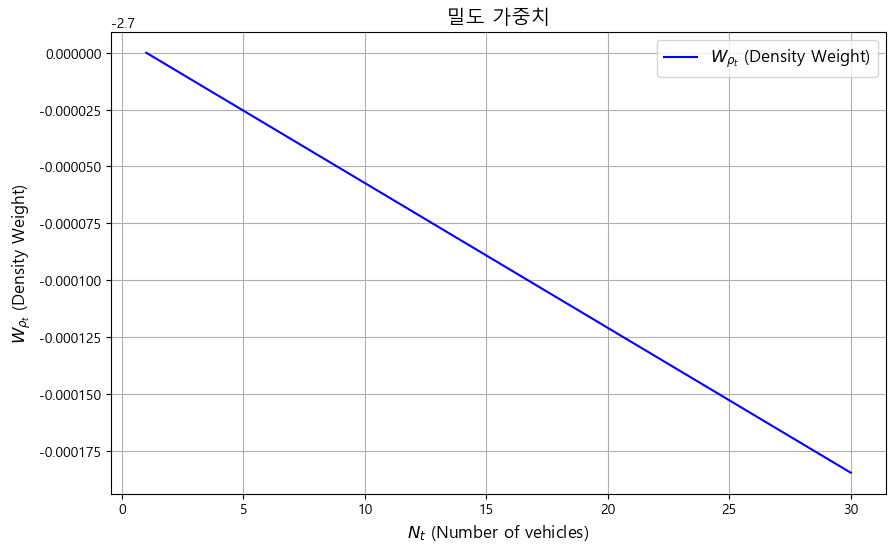

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

np.set_printoptions(suppress=True, precision=4) 

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
# Parameters
W_base_rho = 0.027  # 기본 밀도 가중치
F_rho = 0.001  # 민감도 조정 계수
W_min = 0.01  # Minimum limit for W_rho_t
W_max = 0.10  # Maximum limit for W_rho_t

# Density values
R = 50  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density
rho_t_avg = np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)  # Average density

# Calculate W_rho_t
W_rho_t = np.clip(
    W_base_rho + np.maximum(
        -0.03, np.minimum((rho_t - rho_t_avg) * F_rho, 0.03)
    ),
    W_min, W_max
)

W_rho_t = W_rho_t * -100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, W_rho_t, label="$W_{\\rho_t}$ (Density Weight)", color="blue")
plt.title("밀도 가중치", fontsize=14)
plt.xlabel("$N_t$ (Number of vehicles)", fontsize=12)
plt.ylabel("$W_{\\rho_t}$ (Density Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


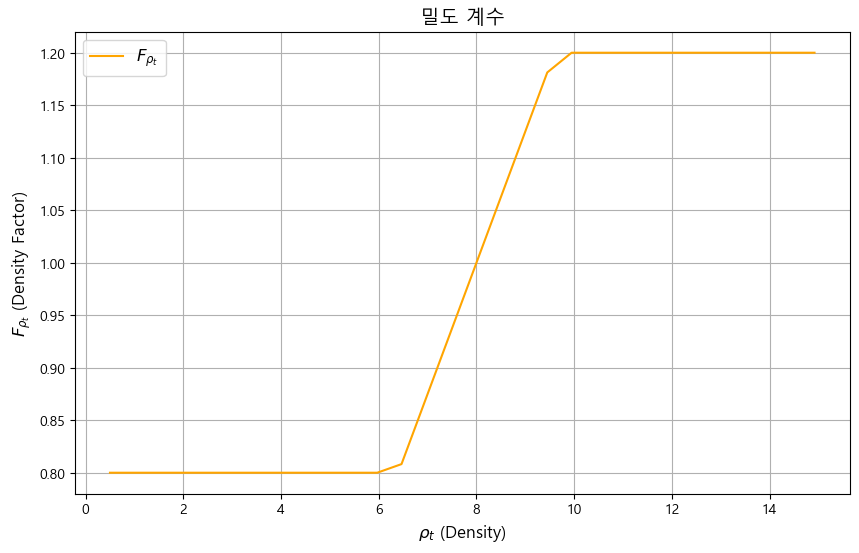

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Given data
R = 0.8  # Example radius in meters
N_t = np.arange(1, 31)  # Vehicle count from 1 to 30
rho_t = N_t / (np.pi * R**2)  # Current density

# Calculate F_rho_t
F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rho_t, F_rho_t, label="$F_{\\rho_t}$", color="orange")
plt.title("밀도 계수", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$F_{\\rho_t}$ (Density Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


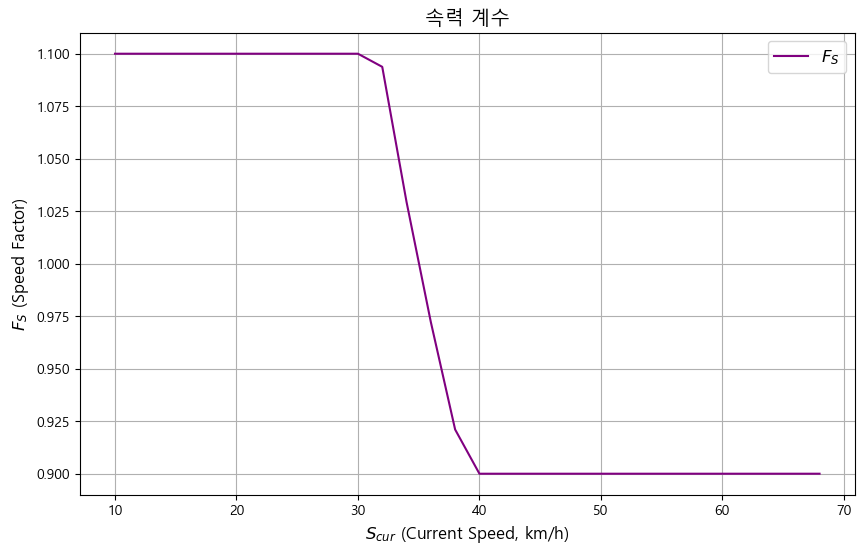

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
# 한글 및 마이너스 기호 설정
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 문제 해결
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우 '맑은 고딕' 설정

# Given data
S_cur = np.arange(10, 70, 2)  # Current speeds

# Calculate F_S
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(S_cur, F_S, label="$F_S$", color="purple")
plt.title("속력 계수", fontsize=14)
plt.xlabel("$S_{cur}$ (Current Speed, km/h)", fontsize=12)
plt.ylabel("$F_S$ (Speed Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


C:\Users\whdgu\AppData\Local\Temp\ipykernel_6636\959572648.py:22: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed


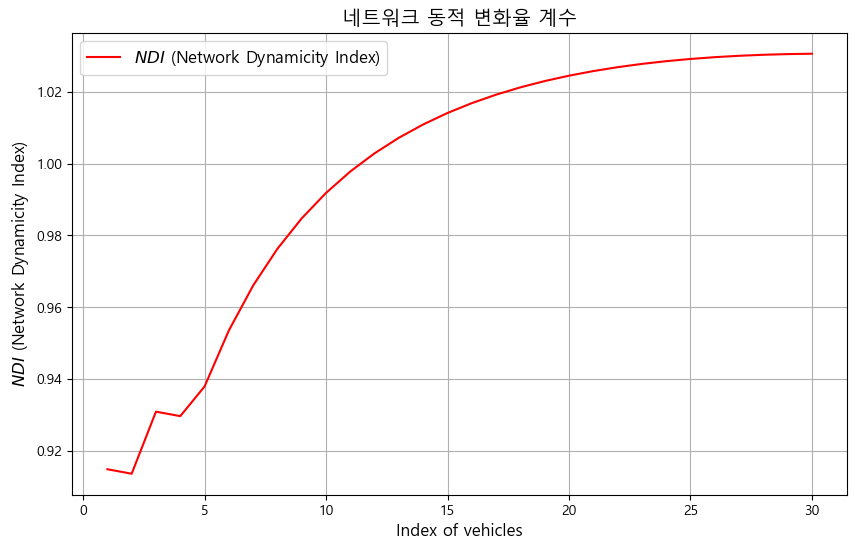

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters and previously calculated values
R = 0.8  # Radius
N_t = np.arange(1, 31)  # Vehicle count
rho_t = N_t / (np.pi * R**2)  # Density
S_prev = np.arange(10, 70, 2)  # Previous speeds
#S_cur = S_prev + np.linspace(-15, 15, len(S_prev))  # Current speeds
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)  # Speed change ratio

# Parameters for weights
W_base_rho = 0.027
W_base_S = 0.0037
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed
F_change = 0.03

# Calculate W_rho_t and W_S
W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum((S_cur - S_avg) * F_S, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)

W_S = W_S * -100
W_rho_t = W_rho_t * -100

# Calculate F_inter
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_inter, label="${NDI}$ (Network Dynamicity Index)", color="red")
plt.title("네트워크 동적 변화율 계수", fontsize=14)
plt.xlabel("Index of vehicles", fontsize=12)
plt.ylabel("${NDI}$ (Network Dynamicity Index)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


[-1268.1384 -1275.8924 -1467.346  -1475.2384 -1579.5935 -1762.282
 -1916.8525 -2049.5503 -2164.9218 -2266.3476 -2356.3893 -2437.0214
 -2520.3406 -2550.3508 -2571.8313 -2655.8621 -2786.7893 -2916.4384
 -3045.1439 -3112.8404 -3152.5436 -3190.3308 -3226.4068 -3260.9484
 -3294.1088 -3326.0215 -3356.8034 -3386.5572 -3415.3736 -3443.3328]


C:\Users\whdgu\AppData\Local\Temp\ipykernel_6636\482172409.py:27: RuntimeWarning: divide by zero encountered in divide
  F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed


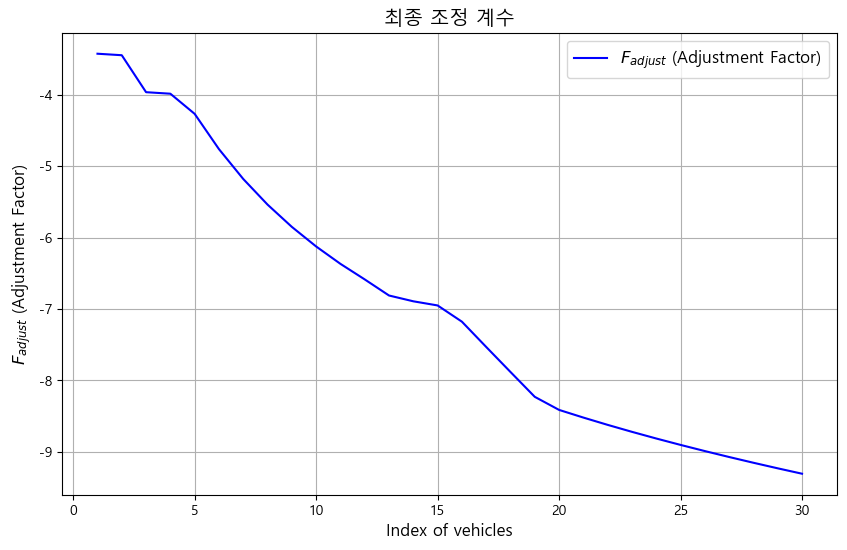

[-3.4274 -3.4484 -3.9658 -3.9871 -4.2692 -4.7629 -5.1807 -5.5393 -5.8511
 -6.1253 -6.3686 -6.5865 -6.8117 -6.8928 -6.9509 -7.178  -7.5319 -7.8823
 -8.2301 -8.4131 -8.5204 -8.6225 -8.72   -8.8134 -8.903  -8.9892 -9.0724
 -9.1529 -9.2307 -9.3063]
[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5.]


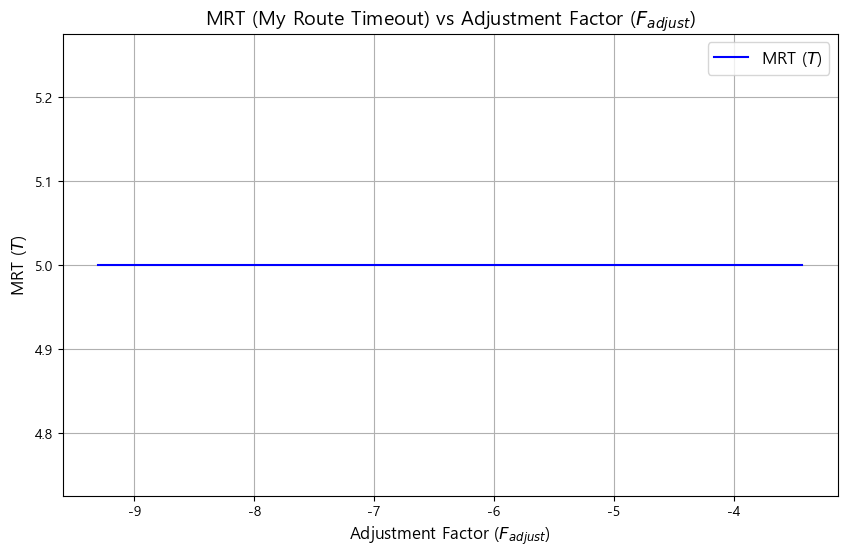

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Parameters for MRT calculation
T_min = 5.0  # Minimum MRT value
T_max = 300.0  # Maximum MRT value
T_base = 170.0  # Base MRT value


# Parameters and previously calculated values
R = 0.8  # Radius
N_t = np.arange(1, 31)  # Vehicle count
rho_t = N_t / (np.pi * R**2)  # Density
S_prev = np.arange(10, 70, 2)  # Previous speeds
S_cur = np.clip(S_prev + np.linspace(-15, 15, len(S_prev)), 0, None)
S_avg = np.cumsum(S_cur) / np.arange(1, len(S_cur) + 1)  # Average speed
delta_S = np.where(S_prev != 0, (S_cur - S_prev) / S_prev, 0)  # Speed change ratio

# Parameters for weights
W_base_rho = 0.027
W_base_S = 0.0037
F_S = np.maximum(0.9, np.minimum(1.1, 35.0 / S_cur))  # Sensitivity factor for speed
F_change = 0.03

# Calculate W_rho_t and W_S
W_rho_t = np.clip(
    W_base_rho + np.maximum(-0.03, np.minimum((rho_t - np.cumsum(rho_t) / np.arange(1, len(rho_t) + 1)) * 0.001, 0.03)),
    0.01, 0.10
)

W_S = np.clip(
    W_base_S + 
    np.maximum(-0.03, np.minimum((S_cur - S_avg) * F_S, 0.03)) +
    np.maximum(-0.02, np.minimum(delta_S * F_change, 0.02)),
    0.01, 0.10
)



# Calculate F_rho_t
F_rho_t = np.maximum(0.8, np.minimum(1.2, rho_t / 8.0))

W_S = W_S * -100
F_rho_t = F_rho_t * -100

# Calculate F_inter
F_inter = 1.0 + (W_rho_t - W_S) * 0.05

# Calculate F_adjust
F_adjust = (W_S * F_S + W_rho_t * F_rho_t) * F_inter

T_base_del = 370.0  # Base value for T_del (Delete Period)
T_max_del = 500.0  # Maximum value for T_del

# Use previously calculated F_adjust
# F_adjust is assumed to be computed from the prior steps

# Calculate DPC (T_del)
T_del = np.minimum(T_max_del, T_base_del * F_adjust)
print(T_del)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(N_t, F_adjust, label="$F_{adjust}$ (Adjustment Factor)", color="blue")
plt.title("최종 조정 계수", fontsize=14)
plt.xlabel("Index of vehicles", fontsize=12)
plt.ylabel("$F_{adjust}$ (Adjustment Factor)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()

print(F_adjust)

T = np.maximum(T_min, np.minimum(T_max, T_base * F_adjust))
print(T)

# Plot MRT (T) vs F_adjust
plt.figure(figsize=(10, 6))
plt.plot(F_adjust, T, label="MRT ($T$)", color="blue")
plt.title("MRT (My Route Timeout) vs Adjustment Factor ($F_{adjust}$)", fontsize=14)
plt.xlabel("Adjustment Factor ($F_{adjust}$)", fontsize=12)
plt.ylabel("MRT ($T$)", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


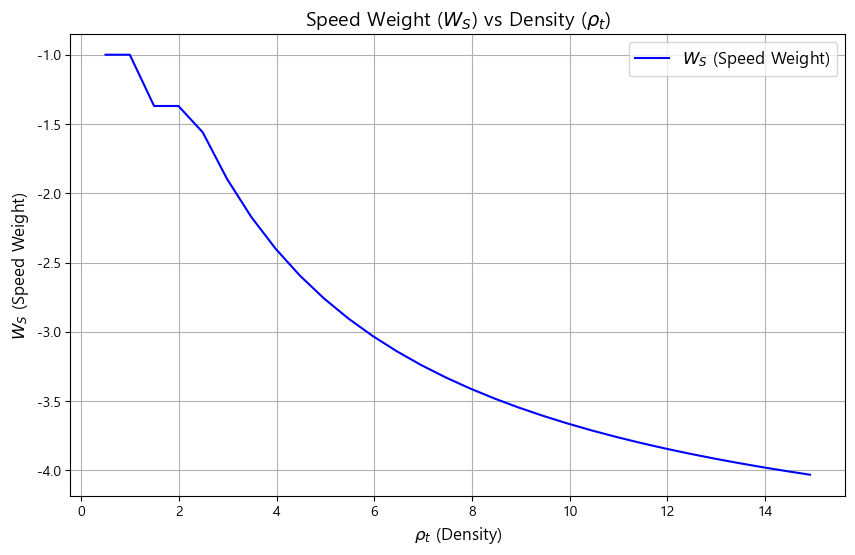

In [11]:
# Plot W_S (Speed Weight) vs rho_t (Density)
plt.figure(figsize=(10, 6))
plt.plot(rho_t, W_S[:len(rho_t)], label="$W_S$ (Speed Weight)", color="blue")
plt.title("Speed Weight ($W_S$) vs Density ($\\rho_t$)", fontsize=14)
plt.xlabel("$\\rho_t$ (Density)", fontsize=12)
plt.ylabel("$W_S$ (Speed Weight)", fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.show()


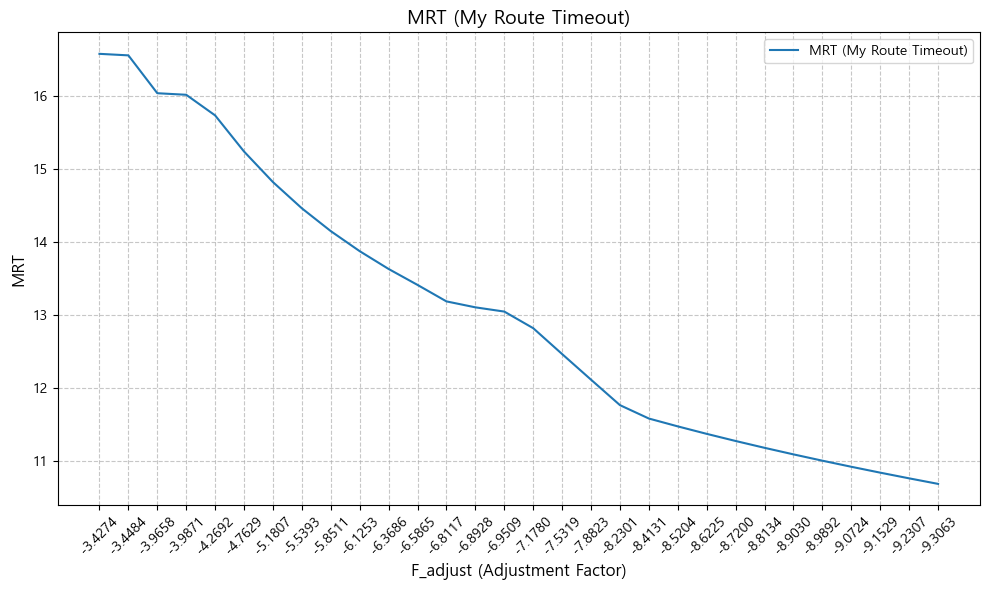

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc


if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')


np.set_printoptions(suppress=True, precision=4)

#F_adjust = F_adjust * 0.5

# Given data
data = F_adjust + 20

# X-axis labels
x_labels = F_adjust

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data, marker=None, linestyle='-', label='MRT (My Route Timeout)')

# Set custom X-axis labels with 4 decimal places
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('MRT (My Route Timeout)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('MRT', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()


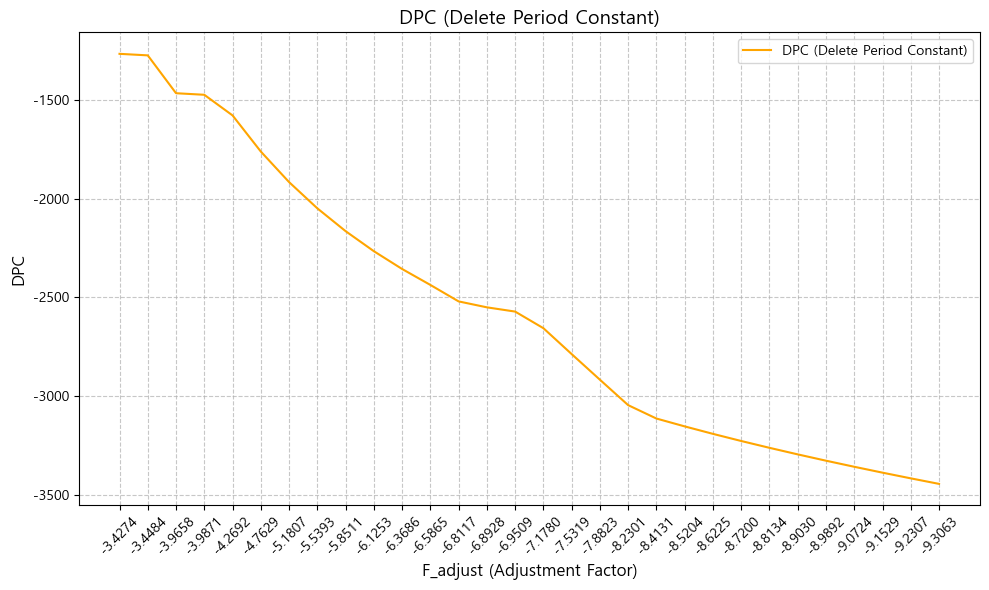

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')

# Second dataset (Y-axis data)
data_2 = T_del

# Custom X-axis data (labels for the X-axis)
x_labels = F_adjust

# Plotting the second dataset
plt.figure(figsize=(10, 6))
plt.plot(data_2, marker=None, linestyle='-', color='orange', label='DPC (Delete Period Constant)')

# Set custom X-axis labels
plt.xticks(ticks=range(len(x_labels)), labels=[f"{x:.4f}" for x in x_labels], rotation=45)

plt.title('DPC (Delete Period Constant)', fontsize=14)
plt.xlabel('F_adjust (Adjustment Factor)', fontsize=12)
plt.ylabel('DPC', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()  # Adjust layout for label readability
plt.show()
